In [1]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Brasileirao/Cruzeiro/Cruzeiro_Atletico_15102025/df_cruzeiro.csv'

In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv(path, sep=';')

In [4]:
data.head()

,Jogador,Minutes,PrgC,PrgP,G+A,Gls,xG,TklW,Int,SCA,Succ Take-Ons
0,Matheus Pereira,2011,58,130,12,5,3.2,26,10,149,26
1,Kaiki,2203,50,79,4,1,3.1,60,32,46,28
2,Wanderson,1693,48,35,2,0,2.2,7,6,63,33
3,Kaio Jorge,1963,43,29,21,15,12.4,6,5,55,22
4,Lucas Silva,2008,29,129,4,2,0.7,26,10,49,17


In [5]:
data.columns

Index(['Jogador', 'Minutes', 'PrgC', 'PrgP', 'G+A', 'Gls', 'xG', 'TklW', 'Int',
       'SCA', 'Succ Take-Ons'],
      dtype='object')

In [7]:
# Métricas por 90 minutos
data['TklW/90'] = (data['TklW'] * 90) / (data['Minutes'])
data['Int/90'] = (data['Int'] * 90) / (data['Minutes'])
data['PrgC/90'] = (data['PrgC'] * 90) / (data['Minutes'])
data['PrgP/90'] = (data['PrgP'] * 90) / (data['Minutes'])
data['G+A/90'] = (data['G+A'] * 90) / (data['Minutes'])
data['Gls/90'] = (data['Gls'] * 90) / (data['Minutes'])
data['SCA/90'] = (data['SCA'] * 90) / (data['Minutes'])
data['Succ Take-Ons/90'] = (data['Succ Take-Ons'] * 90) / (data['Minutes'])
data['xG/90'] = (data['xG'] * 90) / (data['Minutes'])

In [8]:
data.head()

,Jogador,Minutes,PrgC,PrgP,G+A,Gls,xG,TklW,Int,SCA,Succ Take-Ons,TklW/90,Int/90,PrgC/90,PrgP/90,G+A/90,Gls/90,SCA/90,Succ Take-Ons/90,xG/90
0,Matheus Pereira,2011,58,130,12,5,3.2,26,10,149,26,1.163600,0.447539,2.595724,5.818001,0.537046,0.223769,6.668324,1.163600,0.143212
1,Kaiki,2203,50,79,4,1,3.1,60,32,46,28,2.451203,1.307308,2.042669,3.227417,0.163414,0.040853,1.879256,1.143895,0.126645
2,Wanderson,1693,48,35,2,0,2.2,7,6,63,33,0.372120,0.318960,2.551683,1.860602,0.106320,0.000000,3.349084,1.754282,0.116952
3,Kaio Jorge,1963,43,29,21,15,12.4,6,5,55,22,0.275089,0.229241,1.971472,1.329598,0.962812,0.687723,2.521651,1.008660,0.568518
4,Lucas Silva,2008,29,129,4,2,0.7,26,10,49,17,1.165339,0.448207,1.299801,5.781873,0.179283,0.089641,2.196215,0.761952,0.031375


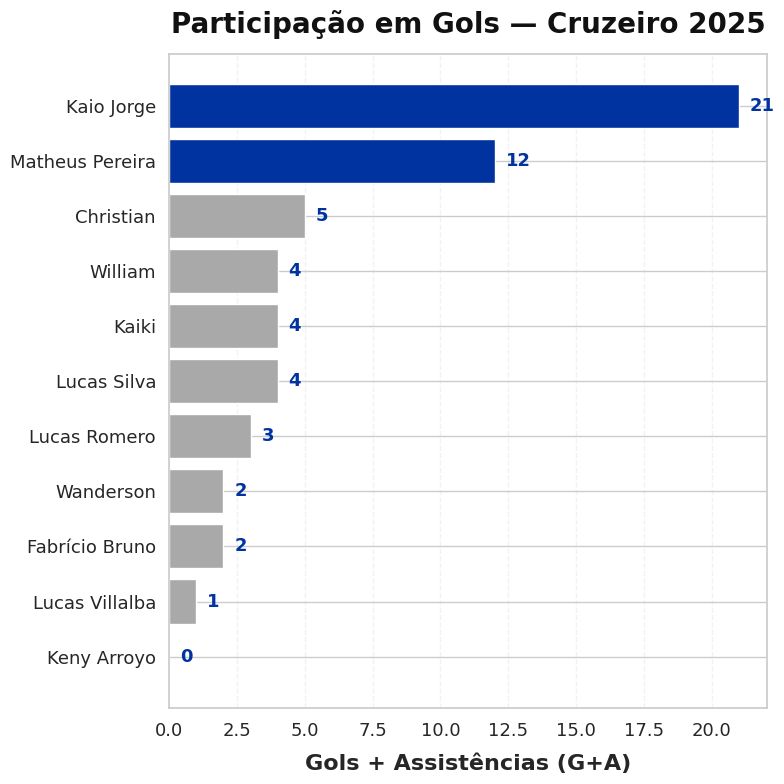

In [84]:
# Ordenar e definir cores
df_sorted = data.sort_values('G+A', ascending=False)
colors = ['#0033A0' if p in ['Matheus Pereira', 'Kaio Jorge'] else '#A9A9A9'
          for p in df_sorted['Jogador']]

# Figura
plt.figure(figsize=(8, 8))
bars = plt.barh(df_sorted['Jogador'], df_sorted['G+A'], color=colors)

# Eixos e títulos com fontes maiores
plt.xlabel('Gols + Assistências (G+A)', fontsize=16, weight='bold', labelpad=10)
plt.title('Participação em Gols — Cruzeiro 2025', fontsize=20, weight='bold', pad=15, color='#111')

# Rótulos de valores à direita das barras
for i, v in enumerate(df_sorted['G+A']):
    plt.text(v + 0.4, i, f'{v}', va='center', fontsize=13, fontweight='bold', color='#0033A0')

# Ajustes visuais
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.25)
plt.tight_layout()
plt.gcf().set_facecolor('white')
plt.show()

In [64]:
kj = pd.read_csv('https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Brasileirao/Cruzeiro/Cruzeiro_15102025/kaio_jorge.csv', sep=';')

kj.columns

Index(['Rodada', 'xG', 'Gols'], dtype='object')

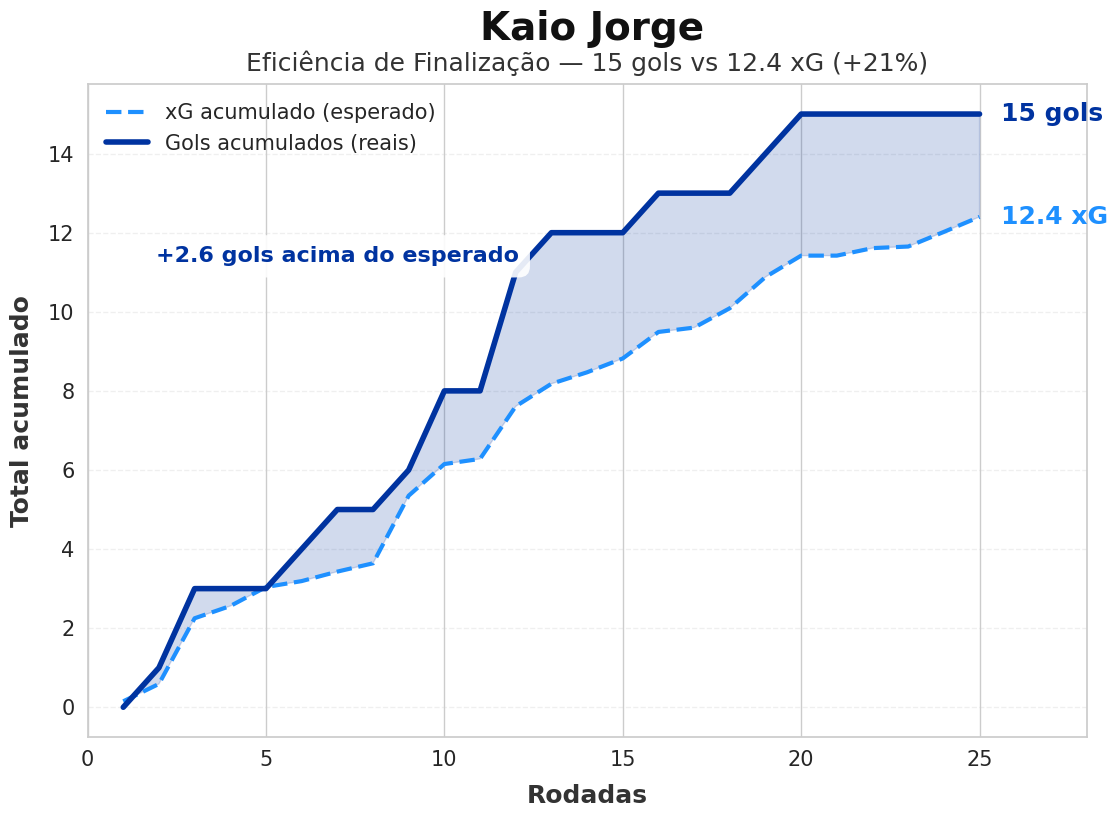

In [80]:
# Recalcular acumulados (por segurança)
kj['xG_acum'] = kj['xG'].cumsum()
kj['Gols_acum'] = kj['Gols'].cumsum()
dif = kj['Gols_acum'].iloc[-1] - kj['xG_acum'].iloc[-1]

plt.figure(figsize=(12,8.5))

# Linhas principais
plt.plot(kj['Rodada'], kj['xG_acum'], linestyle='--', linewidth=3,
         color='#1E90FF', label='xG acumulado (esperado)')
plt.plot(kj['Rodada'], kj['Gols_acum'], linewidth=4,
         color='#0033A0', label='Gols acumulados (reais)')

# Preenchimento
plt.fill_between(kj['Rodada'], kj['xG_acum'], kj['Gols_acum'],
                 where=kj['Gols_acum'] > kj['xG_acum'],
                 color='#0033A0', alpha=0.18, interpolate=True)

# Rótulos finais
plt.text(kj['Rodada'].iloc[-1] + 0.6, kj['Gols_acum'].iloc[-1],
         f"{kj['Gols_acum'].iloc[-1]:.0f} gols", color='#0033A0',
         fontsize=18, fontweight='bold', va='center')
plt.text(kj['Rodada'].iloc[-1] + 0.6, kj['xG_acum'].iloc[-1],
         f"{kj['xG_acum'].iloc[-1]:.1f} xG", color='#1E90FF',
         fontsize=18, fontweight='bold', va='center')

# Rótulo deslocado à esquerda e acima da área
plt.text(kj['Rodada'].iloc[int(len(kj)*0.25)],
         kj['Gols_acum'].max()*0.75,
         f"+{dif:.1f} gols acima do esperado",
         fontsize=16, color='#0033A0', fontweight='bold',
         ha='center',
         bbox=dict(facecolor='white', edgecolor='none',
                   alpha=0.9, boxstyle='round,pad=0.5'))

# Título e subtítulo
plt.suptitle('Kaio Jorge', fontsize=28, weight='bold', color='#111', y=0.96)
plt.title('Eficiência de Finalização — 15 gols vs 12.4 xG (+21%)',
          fontsize=18, color='#333', pad=10)

# Eixos e grade
plt.xlabel('Rodadas', fontsize=18, color='#333', labelpad=10, weight='bold')
plt.ylabel('Total acumulado', fontsize=18, color='#333', labelpad=10, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Legenda maior e mais legível
plt.legend(fontsize=15, loc='upper left', frameon=False)

# Ticks maiores
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, kj['Rodada'].iloc[-1] + 3)

# Layout final
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.gcf().set_facecolor('white')
plt.show()

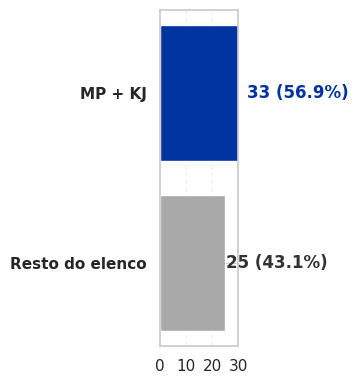

In [92]:
# Calcular totais
dupla = data[data['Jogador'].isin(['Matheus Pereira', 'Kaio Jorge'])]['G+A'].sum()
resto = data[~data['Jogador'].isin(['Matheus Pereira', 'Kaio Jorge'])]['G+A'].sum()
total = dupla + resto

# DataFrame simplificado
df_dupla = pd.DataFrame({
    'Grupo': ['MP + KJ', 'Resto do elenco'],
    'G+A': [dupla, resto]
})

# Cores
colors = ['#0033A0', '#A9A9A9']

# Gráfico
plt.figure(figsize=(4,4))
bars = plt.barh(df_dupla['Grupo'], df_dupla['G+A'], color=colors)

# Rótulos (valor + percentual)
for i, v in enumerate(df_dupla['G+A']):
    pct = (v / total) * 100
    plt.text(v + 0.3, i, f'{v} ({pct:.1f}%)',
             va='center', fontsize=12, fontweight='bold',
             color='#0033A0' if i == 0 else '#333')

# Ajustes visuais
plt.xticks([0, 10, 20, 30], fontsize=11)  # força os ticks até 30
plt.yticks(fontsize=11, weight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.25)
plt.xlim(0, 30)  # garante espaço pro tick final

plt.tight_layout()
plt.gcf().set_facecolor('white')
plt.show()


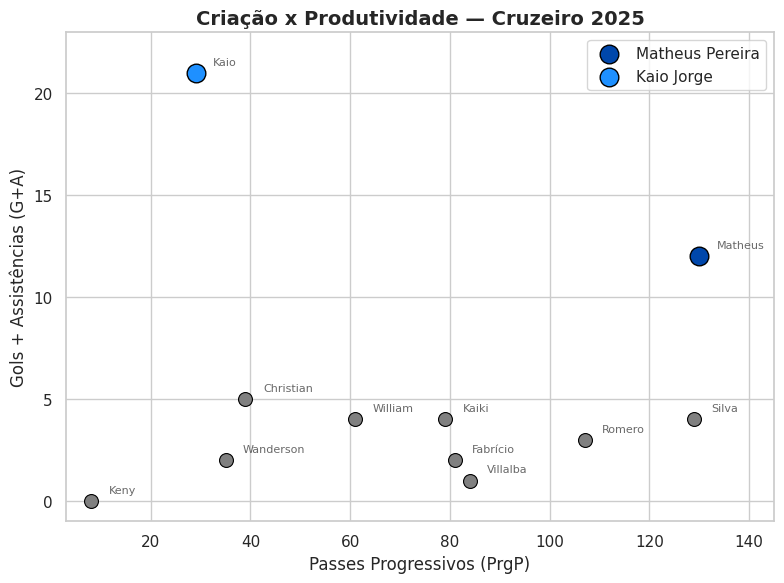

In [22]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

# Scatter base
sns.scatterplot(data=data, x='PrgP', y='G+A', s=100, color='gray', edgecolor='black')

# Destaques (Matheus Pereira e Kaio Jorge)
for player, color in [('Matheus Pereira', '#0047AB'), ('Kaio Jorge', '#1E90FF')]:
    sub = data[data['Jogador'] == player]
    plt.scatter(sub['PrgP'], sub['G+A'], s=180, color=color, label=player, edgecolor='black', zorder=3)

# Rótulos com deslocamento fixo (padronizado)
for _, row in data.iterrows():
    nome = row['Jogador']
    label = nome.split()[1] if nome.startswith("Lucas ") else nome.split()[0]
    plt.text(row['PrgP'] + 3.5, row['G+A'] + 0.4, label,
             fontsize=8, fontweight='medium', color='dimgray')

# Ajustar limites para evitar corte
x_min, x_max = data['PrgP'].min(), data['PrgP'].max()
plt.xlim(x_min - 5, x_max + 15)  # margem extra no lado direito
y_min, y_max = data['G+A'].min(), data['G+A'].max()
plt.ylim(y_min - 1, y_max + 2)

plt.xlabel('Passes Progressivos (PrgP)')
plt.ylabel('Gols + Assistências (G+A)')
plt.title('Criação x Produtividade — Cruzeiro 2025', fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

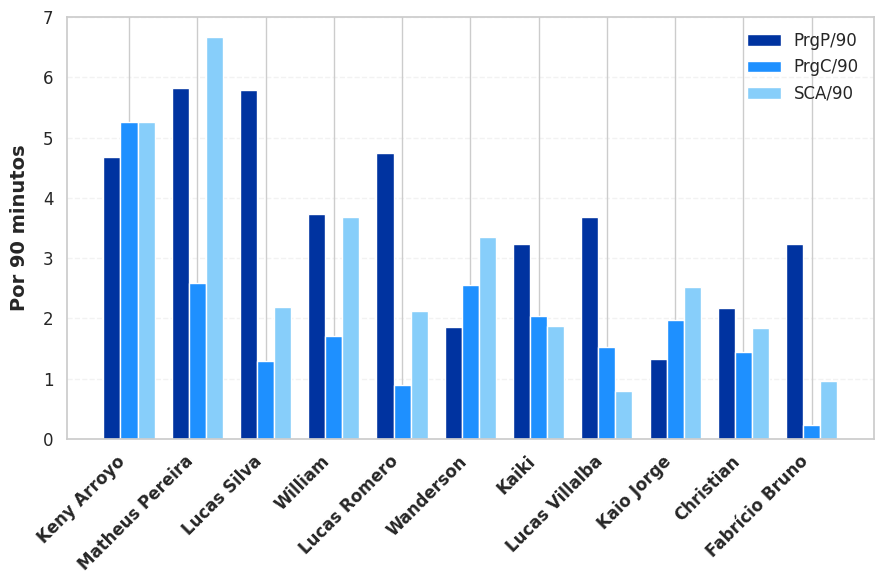

In [95]:
# Selecionar colunas e calcular soma
cols = ['Jogador', 'PrgP/90', 'PrgC/90', 'SCA/90']
df_plot = data[cols].copy()
df_plot['Criação_Total'] = df_plot['PrgP/90'] + df_plot['PrgC/90'] + df_plot['SCA/90']
df_plot = df_plot.sort_values('Criação_Total', ascending=False).reset_index(drop=True)

# Eixo x e largura
x = np.arange(len(df_plot))
width = 0.25

# Figura e estilo
plt.figure(figsize=(9,6))
plt.bar(x - width, df_plot['PrgP/90'], width, label='PrgP/90', color='#0033A0')
plt.bar(x, df_plot['PrgC/90'], width, label='PrgC/90', color='#1E90FF')
plt.bar(x + width, df_plot['SCA/90'], width, label='SCA/90', color='#87CEFA')

# Título e eixos
#plt.title('Indicadores de Criação — Cruzeiro 2025', fontsize=20, weight='bold', pad=15, color='#111')
plt.ylabel('Por 90 minutos', fontsize=14, weight='bold', labelpad=10)
plt.xticks(x, df_plot['Jogador'], rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(fontsize=12)

# Grid leve e fundo branco
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.gcf().set_facecolor('white')

# Legenda enxuta
plt.legend(fontsize=12, frameon=False, loc='upper right')

# Ajustes de layout
plt.tight_layout()
plt.show()

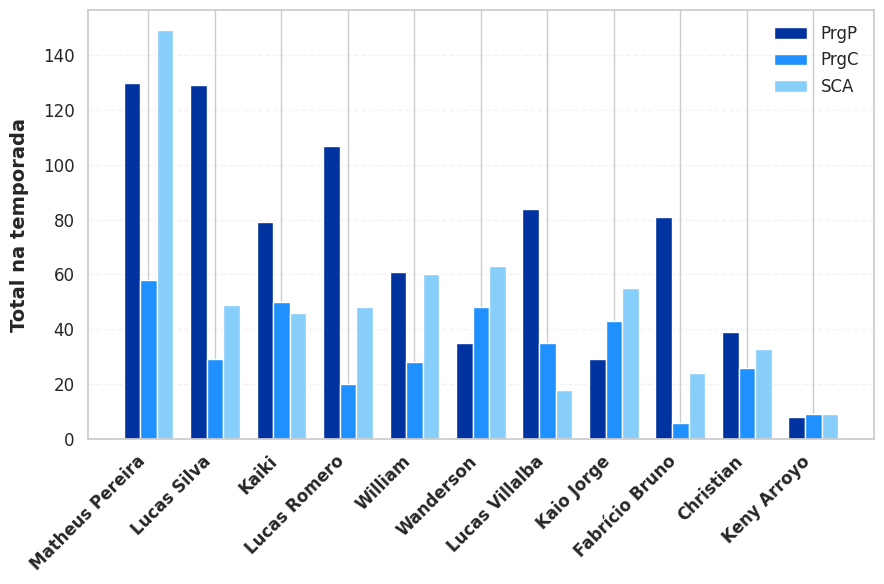

In [96]:
# Selecionar colunas e calcular soma absoluta
cols = ['Jogador', 'PrgP', 'PrgC', 'SCA']
df_plot_abs = data[cols].copy()
df_plot_abs['Criação_Total'] = df_plot_abs['PrgP'] + df_plot_abs['PrgC'] + df_plot_abs['SCA']
df_plot_abs = df_plot_abs.sort_values('Criação_Total', ascending=False).reset_index(drop=True)

# Eixo x e largura
x = np.arange(len(df_plot_abs))
width = 0.25

# Figura e estilo
plt.figure(figsize=(9,6))
plt.bar(x - width, df_plot_abs['PrgP'], width, label='PrgP', color='#0033A0')
plt.bar(x, df_plot_abs['PrgC'], width, label='PrgC', color='#1E90FF')
plt.bar(x + width, df_plot_abs['SCA'], width, label='SCA', color='#87CEFA')

# Título e eixos
plt.ylabel('Total na temporada', fontsize=14, weight='bold', labelpad=10)
plt.xticks(x, df_plot_abs['Jogador'], rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(fontsize=12)

# Grid leve e fundo branco
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.gcf().set_facecolor('white')

# Legenda enxuta
plt.legend(fontsize=12, frameon=False, loc='upper right')

# Ajustes de layout
plt.tight_layout()
plt.show()

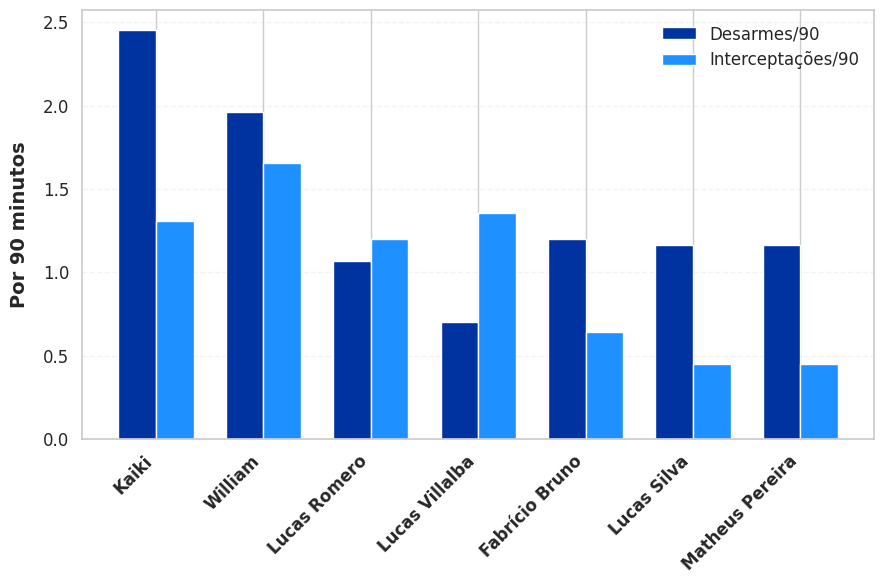

In [98]:
# Jogadores específicos
jogadores_def = ['Kaiki', 'William', 'Lucas Romero', 'Lucas Villalba',
                 'Fabrício Bruno', 'Lucas Silva', 'Matheus Pereira']

# Selecionar colunas e calcular total defensivo
cols = ['Jogador', 'TklW/90', 'Int/90']
df_def = data[data['Jogador'].isin(jogadores_def)][cols].copy()
df_def['Destruição_Total'] = df_def['TklW/90'] + df_def['Int/90']
df_def = df_def.sort_values('Destruição_Total', ascending=False).reset_index(drop=True)

# Eixo x
x = np.arange(len(df_def))
width = 0.35

# Figura
plt.figure(figsize=(9,6))
plt.bar(x - width/2, df_def['TklW/90'], width, label='Desarmes/90', color='#0033A0')
plt.bar(x + width/2, df_def['Int/90'], width, label='Interceptações/90', color='#1E90FF')

# Estética e hierarquia visual
plt.ylabel('Por 90 minutos', fontsize=14, weight='bold', labelpad=10)
plt.xticks(x, df_def['Jogador'], rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(fontsize=12)
#plt.title('Destruição de Jogadas — Cruzeiro 2025', fontsize=20, weight='bold', pad=15, color='#111')

# Grade e fundo
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.gcf().set_facecolor('white')

# Legenda mais limpa e ajustada
plt.legend(fontsize=12, frameon=False, loc='upper right')

# Ajuste do layout
plt.tight_layout()
plt.show()

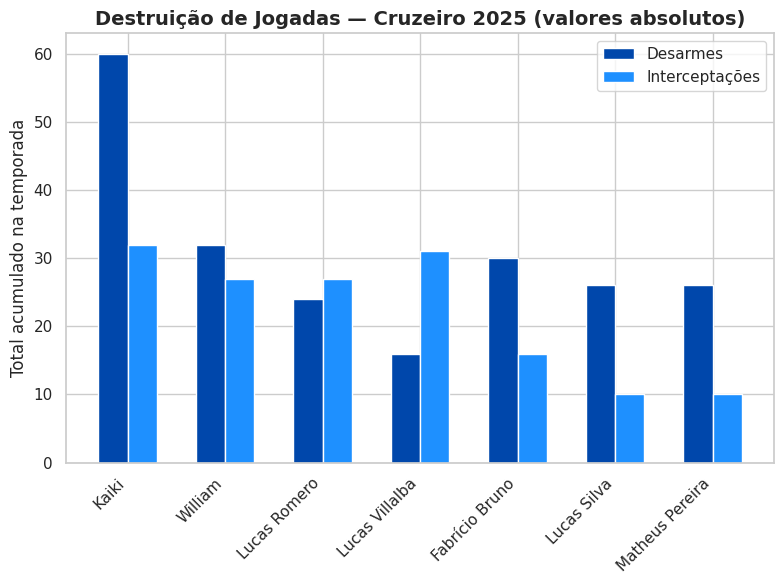

In [53]:
# Jogadores específicos
jogadores_def = ['Kaiki', 'William', 'Lucas Romero', 'Lucas Villalba',
                 'Fabrício Bruno', 'Lucas Silva', 'Matheus Pereira']

# Selecionar colunas relevantes e criar soma absoluta
cols = ['Jogador', 'TklW', 'Int']
df_def = data[data['Jogador'].isin(jogadores_def)][cols].copy()
df_def['Destruição_Total'] = df_def['TklW'] + df_def['Int']

# Ordenar do mais destrutivo para o menos
df_def = df_def.sort_values('Destruição_Total', ascending=False).reset_index(drop=True)

# Eixo x
x = np.arange(len(df_def))
width = 0.3

plt.figure(figsize=(8,6))

# Barras agrupadas (absolutas)
plt.bar(x - width/2, df_def['TklW'], width, label='Desarmes', color='#0047AB')
plt.bar(x + width/2, df_def['Int'], width, label='Interceptações', color='#1E90FF')

# Eixos e legendas
plt.xticks(x, df_def['Jogador'], rotation=45, ha='right')
plt.ylabel('Total acumulado na temporada')
plt.title('Destruição de Jogadas — Cruzeiro 2025 (valores absolutos)', fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

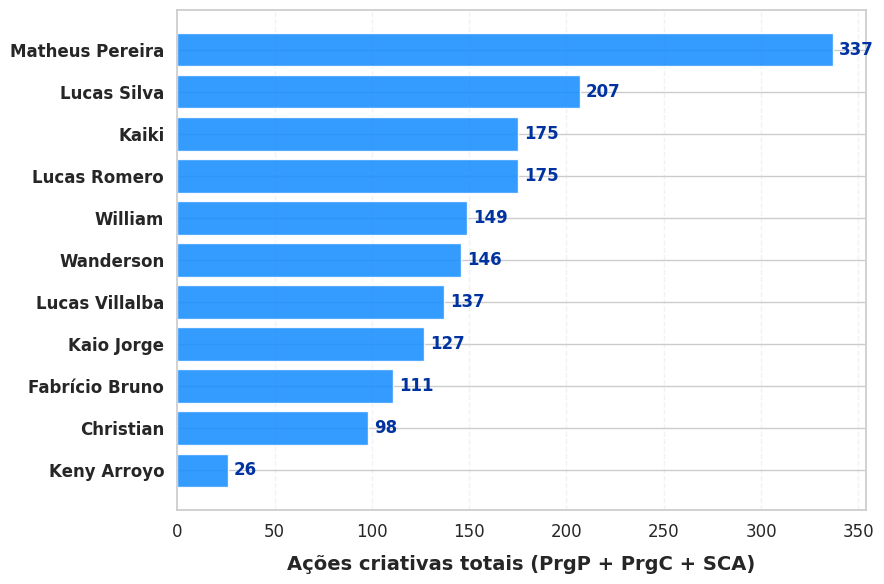

In [100]:
# Criar DataFrame auxiliar
cols = ['Jogador', 'PrgP', 'PrgC', 'SCA']
df_criacao = data[cols].copy()
df_criacao['Criação_Total'] = df_criacao['PrgP'] + df_criacao['PrgC'] + df_criacao['SCA']
df_criacao = df_criacao.sort_values('Criação_Total', ascending=False).reset_index(drop=True)

# Figura
plt.figure(figsize=(9,6))
bars = plt.barh(df_criacao['Jogador'], df_criacao['Criação_Total'],
                color='#1E90FF', alpha=0.9)

# Rótulos e título
plt.xlabel('Ações criativas totais (PrgP + PrgC + SCA)', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('')
#plt.title('Mapa da Criação — Cruzeiro 2025', fontsize=20, weight='bold', pad=15, color='#111')

# Adicionar valores (legíveis e alinhados)
for i, v in enumerate(df_criacao['Criação_Total']):
    plt.text(v + 3, i, f'{v:.0f}', va='center', fontsize=12, fontweight='bold', color='#0033A0')

# Aparência geral
plt.gca().invert_yaxis()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.25)
plt.gcf().set_facecolor('white')

# Margens ajustadas
plt.tight_layout()
plt.show()